In [127]:
try:
    from google.colab import drive, files
    in_colab = True
except ModuleNotFoundError:
    in_colab = False

if in_colab:
    home_dir = ''
    drive.mount('/content/drive')
    groot_dir = '/content/drive/My Drive/adventures/'
else:
    from pathlib import Path
    home_dir = str(Path.home())
    groot_dir = home_dir + '/Google 雲端硬碟 (andrewhuang723@gmail.com)/adventures/'

import requests
import os

def fetch_file_via_requests(url, save_in_dir):
    local_filename = url.split('/')[-1]
    # NOTE the stream=True parameter below
    output_fpath = save_in_dir + local_filename
    with requests.get(url, stream=True) as r:
        r.raise_for_status()
        with open(output_fpath, 'wb') as f:
            for chunk in r.iter_content(chunk_size=8192): 
                if chunk: # filter out keep-alive new chunks
                    f.write(chunk)
                    # f.flush()
    return output_fpath

data_dir = groot_dir + 'chemical_plants/'

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def start_plot(figsize=(10, 8), style = 'whitegrid', dpi = 100):
    fig = plt.figure(figsize=figsize, dpi=dpi)
    gs = fig.add_gridspec(1,1)
    plt.tight_layout()
    with sns.axes_style(style):
        ax = fig.add_subplot(gs[0,0])
    return ax

# HVGO

In [135]:
data = pd.read_excel(os.path.join(data_dir, 'HVGO_op.xlsx'), header=4)
data.set_index('time', inplace=True)
data.head()

,980FT001_C.PNT,980TI120.PNT,980TI118.PNT,980FT025.PNT,980FI044.PNT,980FT043.PNT,(),980FI058.PNT,980TI133.PNT,980TC134.MEAS,...,SC98006C-HT750_90%-.C,SC98006C-HT750_95%-.C,SC98006C-HT750_FBP-.C,SC98006C-HT750_MABP-.C,Unnamed: 97,SC98006C-100VIS-CST,SC98006C-VISINDEX,SC98006C-NITROGEN-PPM,SC98006C-POURPOINT-.C,SC98006C-FLASHPOINT-.C
time,,,,,,,,,,,,,,,,,,,,,
2019-01-01,112.201419,270.998679,330.049871,89340.45386,8.563218,392.196171,400.759389,138.688507,190.372330,204.981693,...,546.8,558.8,583.6,488.05,NaN,10.891,NaN,NaN,NaN,NaN
2019-01-02,112.150804,271.503685,330.053391,89341.33749,8.530484,388.729945,397.260428,138.368148,190.680383,204.991510,...,546.2,559.0,586.2,487.20,NaN,10.577,NaN,NaN,NaN,NaN
2019-01-03,112.266570,271.731132,330.040893,89544.43503,8.287442,387.992828,396.280270,138.137160,190.753505,205.000292,...,546.6,559.6,588.2,487.25,NaN,10.562,NaN,NaN,NaN,NaN
2019-01-04,112.198450,271.822109,329.990407,89473.03642,8.227637,386.617700,394.845337,139.787088,191.731790,204.967740,...,546.4,559.4,586.6,487.20,NaN,10.561,NaN,NaN,NaN,NaN
2019-01-05,112.112285,271.968811,330.006907,89511.87880,8.205710,384.987062,393.192773,137.179543,191.557802,204.967734,...,546.4,559.2,586.2,487.60,NaN,10.582,NaN,NaN,NaN,NaN


In [ ]:
bdata = pd.read_excel(os.path.join(data_dir, 'MV_SV_2019-2021_10min.xlsx'))
bdata.set_index('DateTime', inplace=True)
bdata.head()

,980FT001_C.PNT,980TI120.PNT,980TI118.PNT,980FT025.PNT,980FI044.PNT,980FT043.PNT,980FI058.PNT,980TI133.PNT,980TC134.MEAS,980PI065.PNT,...,980FC050.MEAS,980TI023.PNT,980FC045.MEAS,980TI136.PNT,980FC051.MEAS,980FT055_C.PNT,980HDW_WABT.PNT,980TOTAL_TDI_01.PNT,980HDF_WABT.PNT,980TOTAL_TDI_02.PNT
DateTime,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00.000000,112.178615,270.585223,330.053726,89324.726562,8.534379,393.068610,139.565169,190.483531,205.011363,145.057597,...,1997.064844,278.994458,3462.973389,301.420160,83812.383594,101.561135,329.531927,25.238950,220.494221,3.501637
2019-01-01 00:10:00.000001,112.144730,270.705530,329.989203,89366.839844,8.552425,393.772723,139.496144,191.018921,205.465680,144.905933,...,1995.272778,278.974136,3446.886938,301.338068,85347.166406,103.817818,329.525305,25.346558,220.522220,3.502321
2019-01-01 00:20:00.000000,112.147083,270.974866,330.308447,89401.800781,8.539932,391.386517,139.376488,190.900208,205.340367,144.749977,...,1999.237439,278.762396,3469.446680,301.362552,85744.025000,104.337164,329.539651,25.184717,220.540367,3.512009
2019-01-01 00:30:00.000001,112.178881,271.249646,330.346924,88930.995313,8.546803,390.434790,139.451796,190.806770,205.227574,145.170212,...,2002.193042,278.799112,3462.618237,301.407678,86298.007031,105.186041,329.514310,25.233530,220.528456,3.507972
2019-01-01 00:40:00.000000,112.243406,271.038205,330.145670,89059.589063,8.547845,389.867847,138.901605,190.899866,205.356345,144.544107,...,2000.788013,278.842310,3454.036597,301.447382,85168.274219,103.526470,329.508640,25.320507,220.526962,3.476854


## Finding missing values

In [ ]:
data.isnull().sum()

980FT001_C.PNT              0
980TI120.PNT                0
980TI118.PNT                0
980FT025.PNT                0
980FI044.PNT                0
                         ... 
SC98006C-100VIS-CST         2
SC98006C-VISINDEX         257
SC98006C-NITROGEN-PPM     290
SC98006C-POURPOINT-.C     257
SC98006C-FLASHPOINT-.C    274
Length: 102, dtype: int64

<AxesSubplot:>

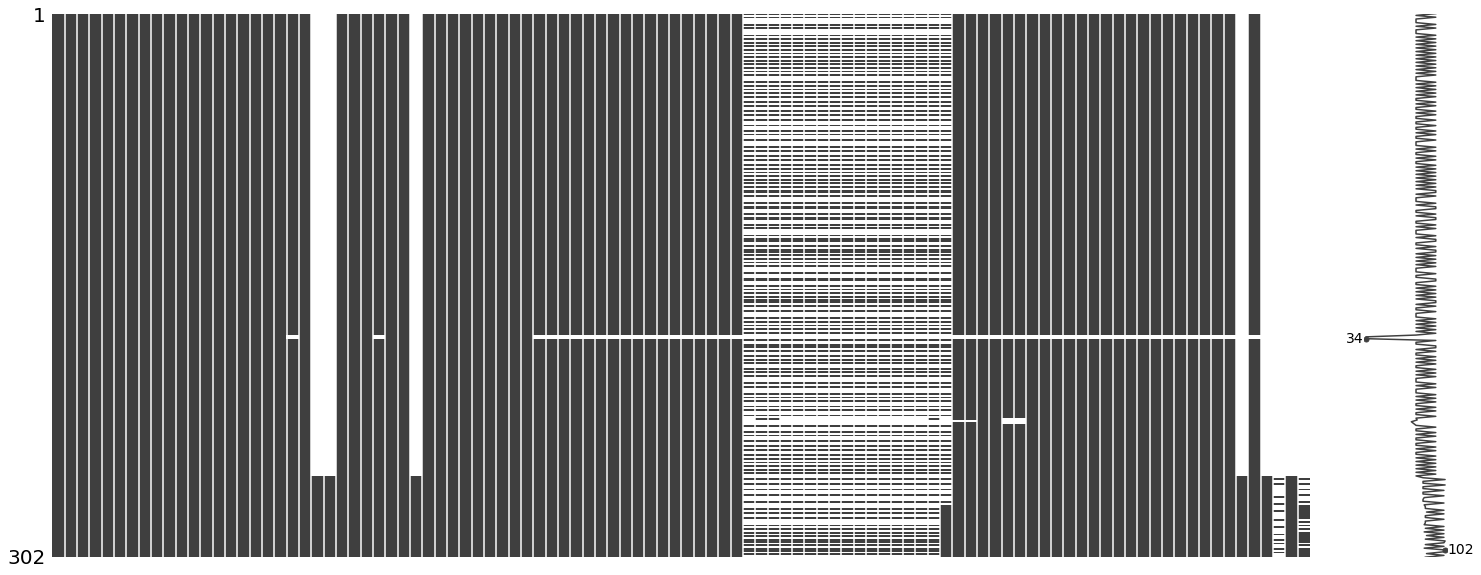

In [ ]:
import missingno as msno

msno.matrix(data)

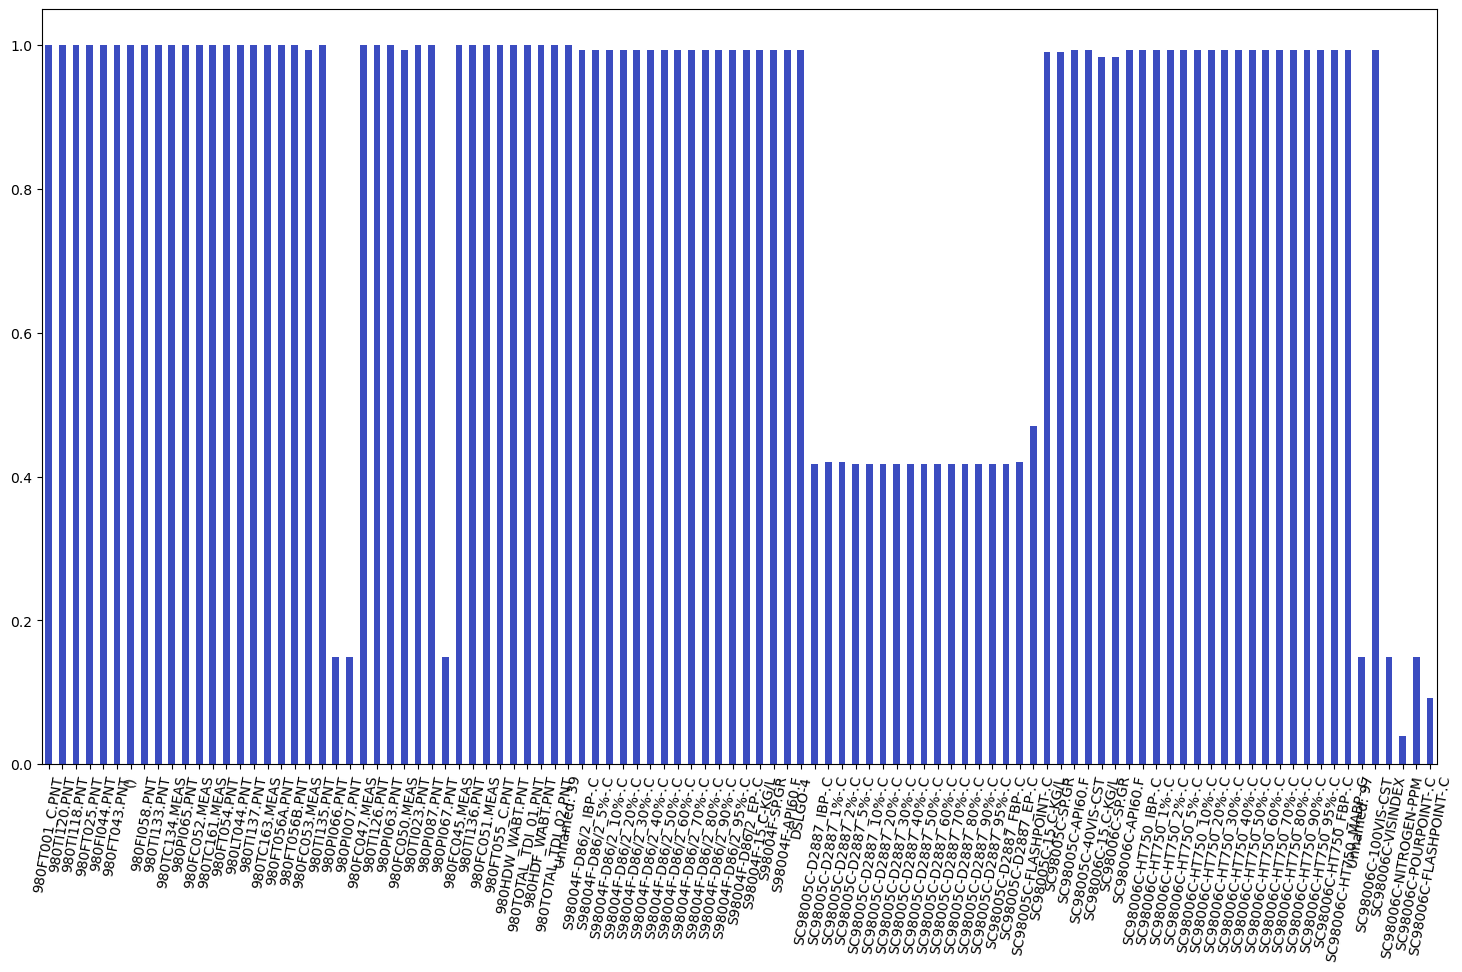

In [ ]:
fig, ax = plt.subplots(figsize=(18, 10), dpi=100)
(1 - data.isnull().mean()).plot.bar(ax=ax, colormap='coolwarm')
ax.tick_params(axis='x', rotation = 80)

## 區分為 

a: null ratio < 0.8 : $77$ columns

b: null ratio > 0.8 : $25$ solumns

In [ ]:
k = (1 - data.isnull().mean()) > 0.8
a_col = k[k.values].index.to_list()
b_col = [i for i in k.index.to_list() if i not in a_col]

adf = data[a_col]
bdf = data[b_col]

## datetime for analysis: not important
## overall for adf is 76 columns
adf.drop(columns=['Unnamed: 39'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
## y for dependent variables
c_y1 = 'S98004F-D86/2_95%-.C'
c_y2 = 'SC98005C-FLASHPOINT-.C'
c_y3 = 'SC98005C-40VIS-CST'
c_y4 = 'SC98006C-100VIS-CST'

ccol = [c_y1, c_y2, c_y3, c_y4]
for i in ccol:
    if i in adf.columns.to_list():
        print(i, ': a')

S98004F-D86/2_95%-.C : a
SC98005C-40VIS-CST : a
SC98006C-100VIS-CST : a


### A 區域

find the missing rows of y and drop them (union)

In [ ]:
n_set = set(adf[adf[c_y1].isnull()].index & adf[adf[c_y3].isnull()].index & adf[adf[c_y4].isnull()].index)
idx_list = list(set.union(n_set))

m_adf = adf.drop(idx_list, axis=0)
m_adf.shape

(300, 76)

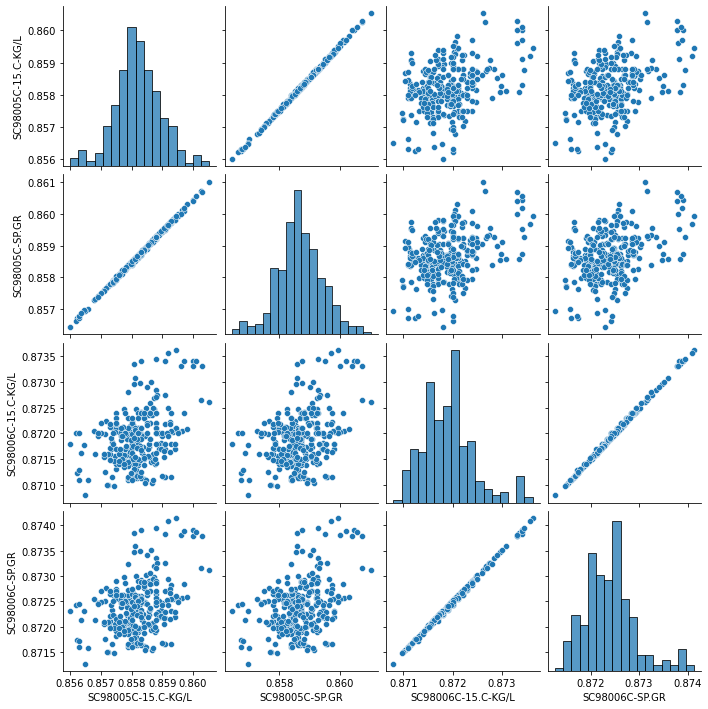

In [ ]:
m = m_adf.isnull().sum() != 0
mndf = m_adf[m[m.values].index]

sns.pairplot(mndf)

In [ ]:
im = mndf[mndf['SC98006C-15.C-KG/L'].isnull()]

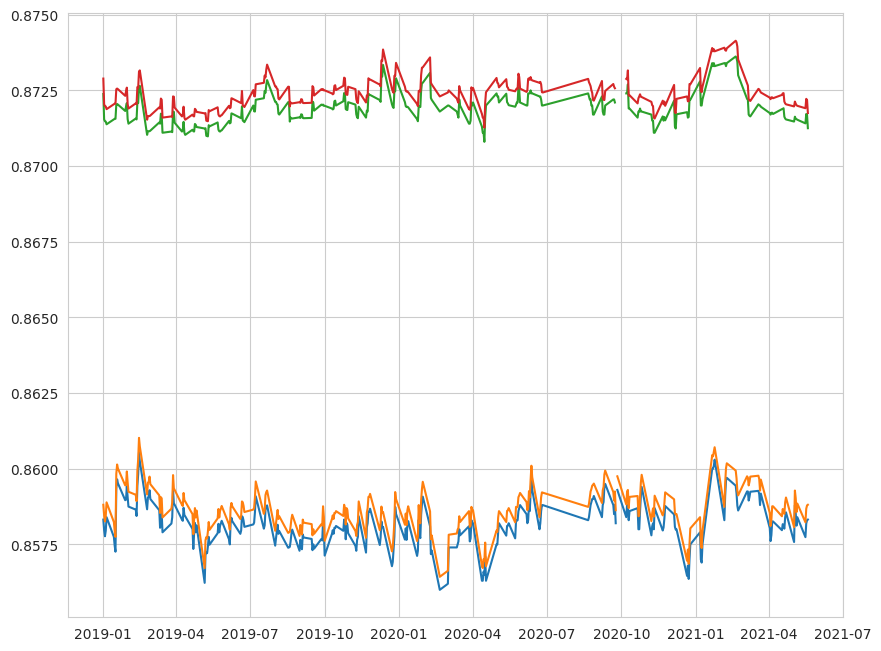

In [ ]:
ax = start_plot()
ax.plot(mndf)

### Impute

15.C-KG/L 和 SP.GR 呈線性關係，但又非常剛好缺失值為同個row(time index)

拆成兩種imputation: 

1. Interpolation: 缺失值僅一個

2. Random sampling: 缺失值有三個，較難去填補

* 補值 僅有一個缺失值的column 'SC98005C-15.C-KG/L' 'SC98005C-SP.GR'



In [ ]:
mndf = m_adf[m[m.values].index]
im = mndf[mndf['SC98005C-15.C-KG/L'].isnull()].index

def interpolation(data, n_idx):
    fill = (data.loc[n_idx + pd.Timedelta(days=1)].values + data.loc[n_idx - pd.Timedelta(days=1)].values) / 2
    return fill

x = interpolation(mndf['SC98005C-15.C-KG/L'], im)
x1 = interpolation(mndf['SC98005C-SP.GR'], im)

all_df = m_adf.copy()

all_df['SC98005C-15.C-KG/L'].fillna(float(x), inplace=True)
all_df['SC98005C-SP.GR'].fillna(float(x1), inplace=True)

* 補值有3個缺失值的columns: 用random sampling from distribution

In [ ]:
def rand_impute(data):
    mean = data.mean()
    std = data.std()
    is_null = data.isnull().sum()
    rand_n = np.random.uniform(mean-std, mean+std, size=is_null)
    impute = data.copy()
    impute[np.isnan(impute)] = rand_n
    return impute 

x_impute = rand_impute(mndf['SC98006C-15.C-KG/L'])
x1_impute = rand_impute(mndf['SC98006C-SP.GR'])
all_df['SC98006C-15.C-KG/L'] = x_impute
all_df['SC98006C-SP.GR'] = x1_impute

檢查 adf有無缺失值

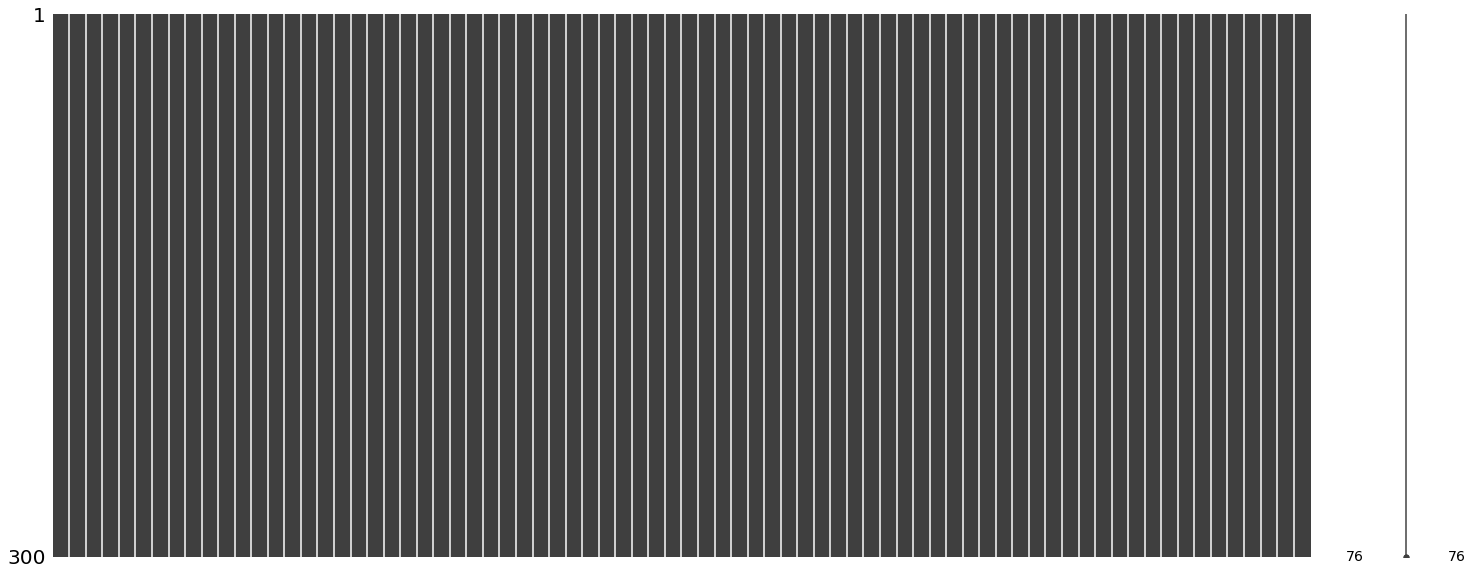

In [ ]:
import missingno as msno

msno.matrix(all_df)

### Regression

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

def simple_ols(xvec, yvec):
    Xadd = sm.add_constant(xvec)
    model = sm.OLS(yvec, Xadd).fit()
    return model

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
threshold = len(all_df) * 2 // 3
threshold = 250

In [ ]:
X = all_df.drop(columns=[c_y1, c_y3, c_y4])[:threshold]
X_test = all_df.drop(columns=[c_y1, c_y3, c_y4])[threshold:]


y1 = all_df[c_y1][:threshold]
y1_test = all_df[c_y1][threshold:]

y3 = all_df[c_y3][:threshold]
y3_test = all_df[c_y3][threshold:]

y4 = all_df[c_y4][:threshold]
y4_test = all_df[c_y4][threshold:]

In [ ]:
model_1 = simple_ols(X, y1)
model_3 = simple_ols(X, y3)
model_4 = simple_ols(X, y4)

In [ ]:
model_1.params

const                    -1997.035306
980FT001_C.PNT               0.075728
980TI120.PNT                 0.096192
980TI118.PNT                 0.233250
980FT025.PNT                 0.000047
                             ...     
SC98006C-HT750_80%-.C       -0.506801
SC98006C-HT750_90%-.C        0.273214
SC98006C-HT750_95%-.C     -102.072316
SC98006C-HT750_FBP-.C        0.009026
SC98006C-HT750_MABP-.C     407.877672
Length: 74, dtype: float64

In [ ]:
def summary_df(result):
    pvals = result.pvalues
    tvals = result.tvalues
    rsquared = result.rsquared
    adj_rsquared = result.rsquared_adj
    coef = result.params

    rdf = pd.DataFrame({'pvals': pvals,
               'tvals': tvals,
               'coef': coef,
               'rsquared': rsquared,
               'adj_rsquared': adj_rsquared})
    return rdf

In [ ]:
df1 = summary_df(model_1)
df1

,pvals,tvals,coef,rsquared,adj_rsquared
const,0.079564,-1.763424,-1997.035306,0.957759,0.940238
980FT001_C.PNT,0.773368,0.288415,0.075728,0.957759,0.940238
980TI120.PNT,0.542243,0.610613,0.096192,0.957759,0.940238
980TI118.PNT,0.359775,0.918192,0.233250,0.957759,0.940238
980FT025.PNT,0.917492,0.103742,0.000047,0.957759,0.940238
...,...,...,...,...,...
SC98006C-HT750_80%-.C,0.050013,-1.973422,-0.506801,0.957759,0.940238
SC98006C-HT750_90%-.C,0.264767,1.118761,0.273214,0.957759,0.940238
SC98006C-HT750_95%-.C,0.139246,-1.485326,-102.072316,0.957759,0.940238
SC98006C-HT750_FBP-.C,0.713655,0.367544,0.009026,0.957759,0.940238


distribution of y1_test & y1

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


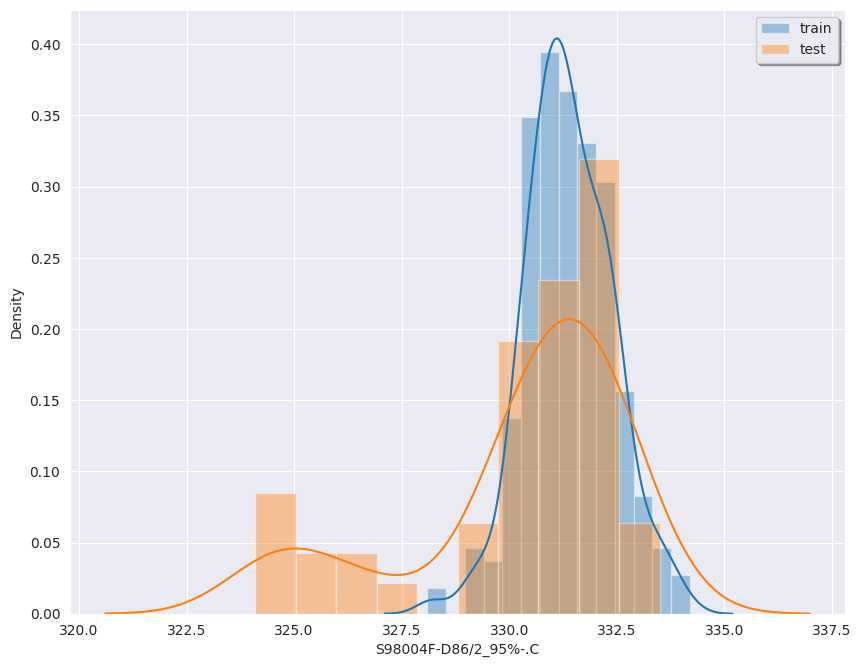

In [ ]:
ax = start_plot(style='darkgrid')
sns.distplot(y1, label='train')
sns.distplot(y1_test, label='test')
ax.legend(shadow=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


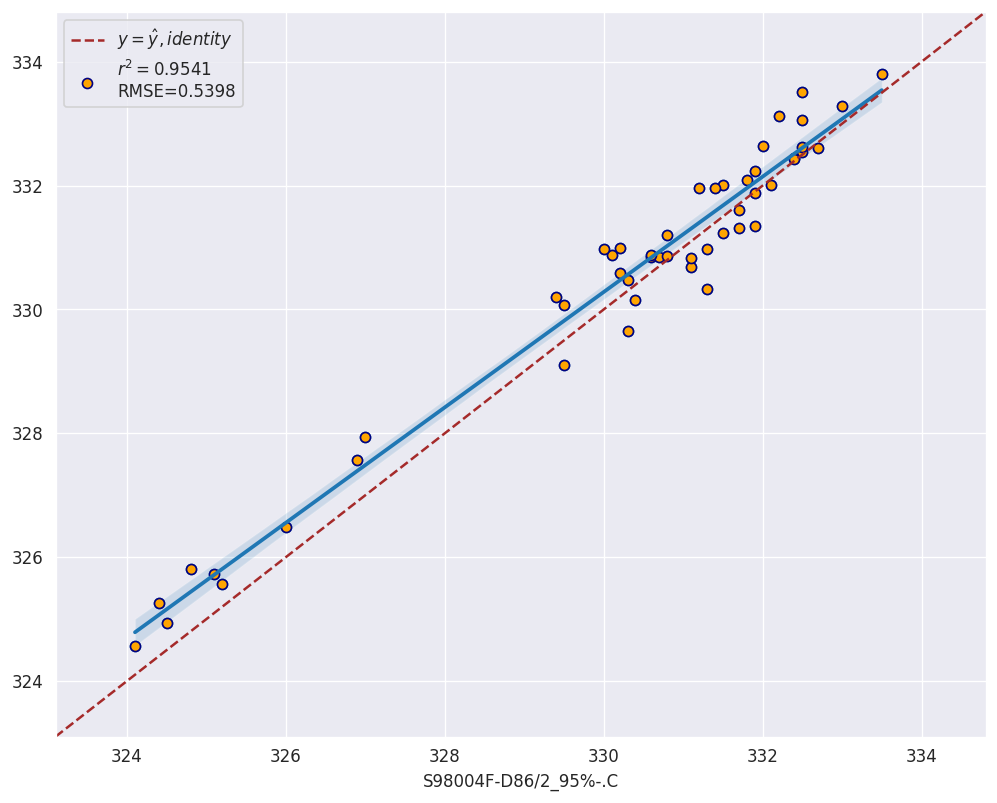

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

X1_test = sm.add_constant(X_test)

y1_pred = model_1.predict(X1_test)

r2_1 = r2_score(y1_pred, y1_test)
rmse_1 = mean_squared_error(y1_pred, y1_test) ** 0.5

ax = start_plot(style='darkgrid', dpi=120)
sns.regplot(y1_test, y1_pred)
ax.scatter(y1_test, y1_pred, edgecolors='navy', color='orange', 
     label=r'$r^2=%.4f$' % r2_score(y1_test, y1_pred) + '\nRMSE=%.4f' % rmse_1)
lim1 = min(min(y1_test), min(y1_pred)) - 1
lim2 = max(max(y1_test), max(y1_pred)) + 1
lim = [lim1, lim2]
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.plot(lim, lim, c='brown', ls='--', label=r'$y=\hat y, identity$')
ax.legend()

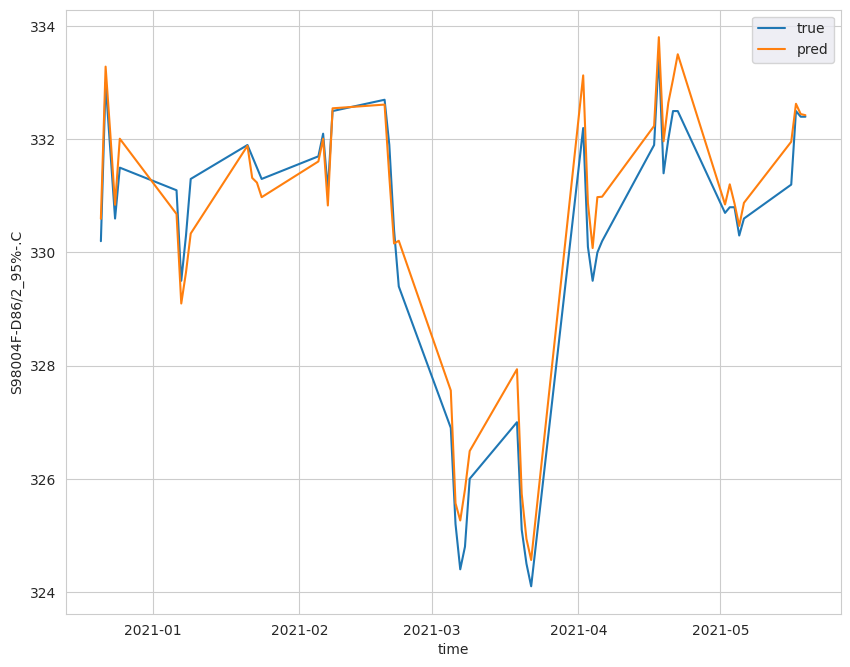

In [ ]:
ax = start_plot()
sns.lineplot(data=y1_test, ax=ax, label='true')
sns.lineplot(data=y1_pred, ax=ax, label='pred')
ax.legend()

In [ ]:
from sklearn.linear_model import LinearRegression
import itertools, operator
from matplotlib.cm import ScalarMappable
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import gridspec

def ResidualsPlot(model, X_train, y_train, X_test=None, y_test=None, layout='h',
                  ax=None, figsize=(16,12), style='darkgrid'):
    
    if X_test is None:
        X_tr, X_te, y_tr, y_te = train_test_split(X_train, y_train, test_size=0.2, random_state=0)
    else:
        X_tr, X_te, y_tr, y_te = X_train, X_test, y_train, y_test
    
    model.fit(X_tr, y_tr)
    yhat_train = model.predict(X_tr)
    r2_train = r2_score(y_tr, yhat_train)
    yhat_test = model.predict(X_te)
    r2_test = r2_score(y_te, yhat_test)

    fig = plt.figure(figsize=figsize)
    gs = gridspec.GridSpec(1, 2, width_ratios=[5, 1])
    plt.tight_layout()
    with sns.axes_style('whitegrid'):
        ax0 = fig.add_subplot(gs[0, 0])
    
    ax0.scatter(yhat_train, y_tr - yhat_train, alpha=0.7, color='navy',
        label=('training ' if X_test is not None else 'dataset examined') +
            r'$R^2=%5.3f$' % r2_train)
    
    ax0.scatter(yhat_test, y_te - yhat_test, alpha=0.7, color='orange', edgecolor='navy',
        label='test ' + r'$R^2=%5.3f$' % r2_test)
    
    ax0.set_xlabel('Predicted', fontsize=14)
    ax0.set_ylabel('Residuals', fontsize=14)
    ax0.axhline(y=0, c='r', ls='--', lw=2)
    ax0.legend(loc='best', fontsize=14, fancybox=True, shadow=True, edgecolor='navy')
    
    with sns.axes_style('darkgrid'):
        ax1 = fig.add_subplot(gs[0, 1])
        sns.distplot(y_train - yhat_train, color='navy', bins=30, vertical=True,
            label='training' if X_test is not None else 'examined',
            hist_kws={'edgecolor':'black'}, kde_kws={'linewidth':3})
    
    if X_test is not None:
        sns.distplot(y_test - yhat_test, color='darkorange', bins=30,
            label='test', vertical=True, ax=ax1, hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 3})
    
    ax1.legend(loc='best', fontsize=12, edgecolor='green', shadow=True, fancybox=True)
    ax1.set_xlabel('Distribution', fontsize=14)
    ax1.set_ylabel('')
    ax1.tick_params(axis='y', direction='in', labelleft=False, right=True, left=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1647: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distr

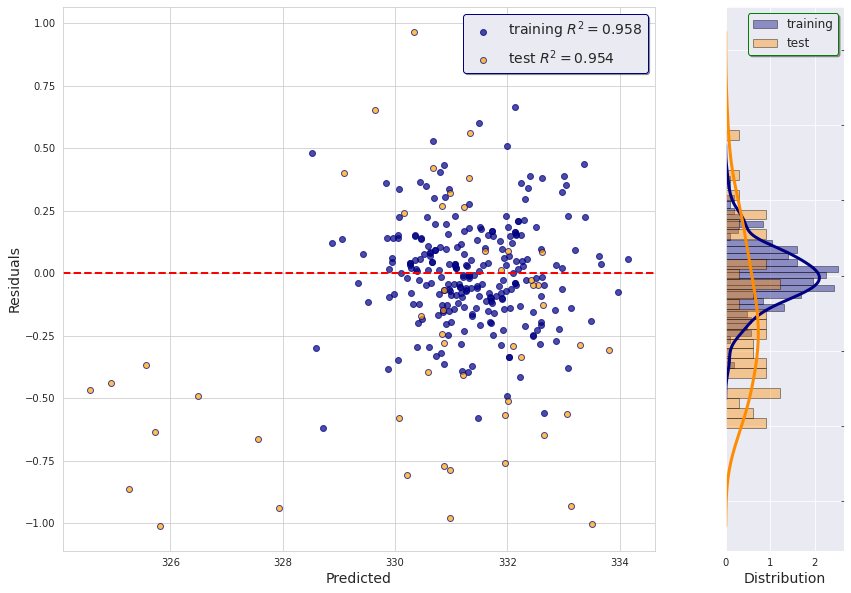

In [ ]:
ResidualsPlot(LinearRegression(), X, y1, X_test, y1_test, figsize=(14,10))

做出 score v.s data size的  learning plot

In [ ]:
from sklearn.model_selection import learning_curve

#
# Simplified version of plot_learning_curves presented in 
#   https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html
#

def my_plot_learning_curves(model, X, y, cv=None, scoring = None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    
       
    fig,ax = plt.subplots(figsize = (10, 8))
    ax.set_xlabel("Training examples")
    ax.set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(model, X, y, cv=cv, n_jobs=n_jobs, 
                scoring = scoring,
                train_sizes=train_sizes,
                return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    ax.grid()
    ax.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    ax.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    ax.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    ax.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    ax.legend(loc="best")

NameError: ignored

In [ ]:
X.shape, y1.shape

((250, 73), (250,))

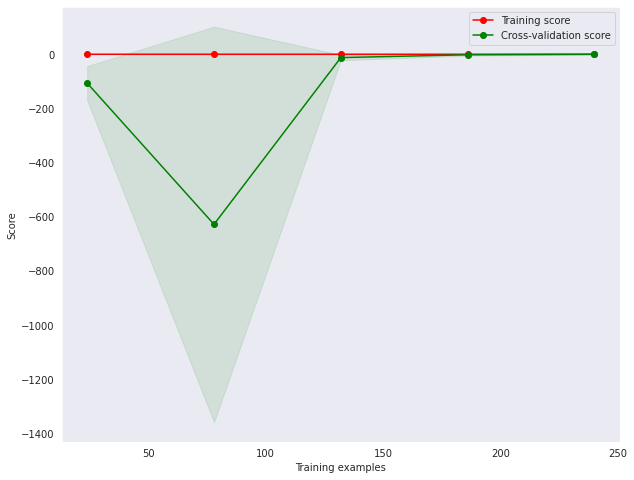

In [ ]:
linr = LinearRegression()

xx = all_df.drop(columns=[c_y1, c_y3, c_y4])
yy = all_df[c_y1]
my_plot_learning_curves(linr, xx, yy)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

def learning_curve_data(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)
    train_errors, test_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y[:m])
        y_train_predict = model.predict(X_train[:m])
        y_test_predict = model.predict(X_test)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        test_errors.append(mean_squared_error(y_test, y_test_predict))
    return train_errors, test_errors

def reg_lr_curve(model, X, y):
    train, test = learning_curve_data(model, X, y)

    sns.set_style('darkgrid')
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.lineplot(range(len(train)), np.sqrt(train), ax=ax, color='brown')
    sns.lineplot(range(len(train)), np.sqrt(test), ax=ax)
    ax.legend(
        ['Train Error', 'Test Error'],
        shadow=True, frameon=True, fontsize=14, facecolor='white'
    )
    ax.set_ylabel('RMSE')
    ax.set_xlabel('Training size')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


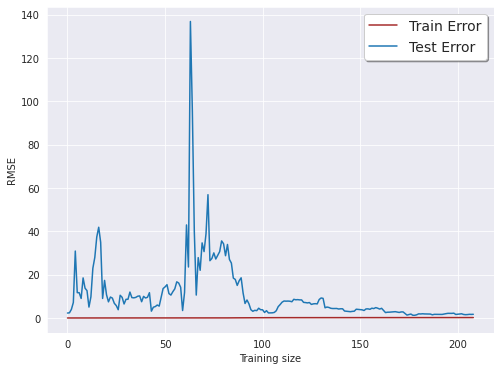

In [ ]:
from sklearn.linear_model import LinearRegression

linr = LinearRegression()

reg_lr_curve(linr, xx, yy)

# MV_SV_2019-2021_10min data analysis

Preview

In [ ]:
bdata.tail()

,980FT001_C.PNT,980TI120.PNT,980TI118.PNT,980FT025.PNT,980FI044.PNT,980FT043.PNT,980FI058.PNT,980TI133.PNT,980TC134.MEAS,980PI065.PNT,...,980FC050.MEAS,980TI023.PNT,980FC045.MEAS,980TI136.PNT,980FC051.MEAS,980FT055_C.PNT,980HDW_WABT.PNT,980TOTAL_TDI_01.PNT,980HDF_WABT.PNT,980TOTAL_TDI_02.PNT
DateTime,,,,,,,,,,,,,,,,,,,,,
2021-05-31 23:10:00.000000,112.516663,272.566434,329.907175,89686.190625,7.076172,383.327768,178.478618,201.851474,202.645293,145.288307,...,1903.726331,289.657919,4127.707031,311.604865,84761.831250,0.0,327.865994,23.397792,220.594887,3.458132
2021-05-31 23:20:00.000000,112.473703,272.700143,329.940359,89495.327344,7.058582,382.551816,177.679391,202.339447,203.007043,144.830368,...,1902.940332,289.788751,4109.693921,311.597021,84997.273438,0.0,327.836676,23.187422,220.615025,3.481373
2021-05-31 23:29:59.999999,112.468579,272.749084,330.033752,89346.669531,7.072994,381.848123,177.924770,202.164162,202.888341,144.928540,...,1902.365417,289.680008,4101.773364,311.630151,84464.907812,0.0,327.854922,23.312856,220.605058,3.516801
2021-05-31 23:40:00.000000,112.422389,272.515775,329.929834,89368.259375,7.063678,381.549512,176.952696,202.032474,202.771815,145.089604,...,1907.349329,289.947070,4071.109912,311.664200,83336.575781,0.0,327.842874,23.367069,220.594347,3.495318
2021-05-31 23:49:59.999999,112.369695,272.143683,329.753531,89556.663281,7.085998,383.390015,177.150546,202.268330,203.015675,144.882065,...,1901.990393,290.042386,4068.018579,311.693256,82704.966406,0.0,327.858826,23.318593,220.605354,3.478445


In [ ]:
bdata.isnull().sum()

980FT001_C.PNT         0
980TI120.PNT           0
980TI118.PNT           0
980FT025.PNT           0
980FI044.PNT           0
980FT043.PNT           0
980FI058.PNT           0
980TI133.PNT           1
980TC134.MEAS          0
980PI065.PNT           0
980FC052.MEAS          0
980TC161.MEAS          0
980FT054.PNT           0
980LT044.PNT           0
980TI137.PNT           0
980TC163.MEAS          0
980FT056A.PNT          0
980FT056B.PNT          0
980FC053.MEAS          0
980TI135.PNT           0
980FC047.MEAS          0
980TI126.PNT           0
980FC050.MEAS          0
980TI023.PNT           0
980FC045.MEAS          0
980TI136.PNT           0
980FC051.MEAS          0
980FT055_C.PNT         0
980HDW_WABT.PNT        0
980TOTAL_TDI_01.PNT    0
980HDF_WABT.PNT        0
980TOTAL_TDI_02.PNT    0
dtype: int64

Filling null for 980TI133.PNT column, but only one null

In [ ]:
bdata['980TI133.PNT'] = bdata['980TI133.PNT'].fillna(bdata['980TI133.PNT'].median())

TypeError: ignored

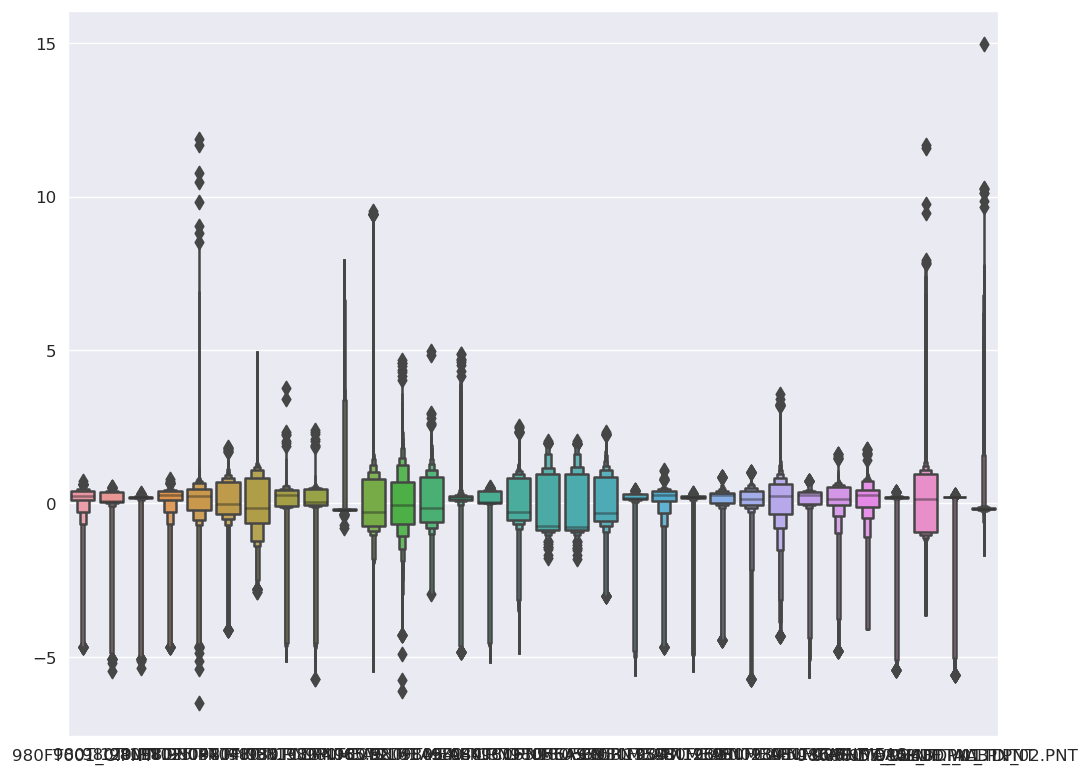

In [ ]:
ax = start_plot(style='darkgrid', dpi=120)
bsdf = (bdata - bdata.mean()) / bdata.std()
g = sns.boxenplot(data=bsdf)
g.set_xticklabels(rotate=30)

# Type 合併

<font color='orange'>type data<font>

In [ ]:
type_data = pd.read_excel(os.path.join(data_dir, 'type.xlsx'), header=None)
type_data.rename(columns={0: 'time', 1: 'class'}, inplace=True)
type_data.set_index('time', inplace=True)
type_data.tail()

,class
time,
2021-05-16,HVGO
2021-05-17,HVGO
2021-05-18,HVGO
2021-05-19,HVGO
2021-05-20,HVGO


predict data

In [ ]:
%%time
pred_data = pd.read_excel(os.path.join(data_dir, 'MV_SV_2019-2021_10min.xlsx'))
pred_data.set_index('DateTime', inplace=True)
pred_data.head()

Wall time: 1min 3s


,980FT001_C.PNT,980TI120.PNT,980TI118.PNT,980FT025.PNT,980FI044.PNT,980FT043.PNT,980FI058.PNT,980TI133.PNT,980TC134.MEAS,980PI065.PNT,...,980FC050.MEAS,980TI023.PNT,980FC045.MEAS,980TI136.PNT,980FC051.MEAS,980FT055_C.PNT,980HDW_WABT.PNT,980TOTAL_TDI_01.PNT,980HDF_WABT.PNT,980TOTAL_TDI_02.PNT
DateTime,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00.000000,112.178615,270.585223,330.053726,89324.726562,8.534379,393.068610,139.565169,190.483531,205.011363,145.057597,...,1997.064844,278.994458,3462.973389,301.420160,83812.383594,101.561135,329.531927,25.238950,220.494221,3.501637
2019-01-01 00:10:00.000001,112.144730,270.705530,329.989203,89366.839844,8.552425,393.772723,139.496144,191.018921,205.465680,144.905933,...,1995.272778,278.974136,3446.886938,301.338068,85347.166406,103.817818,329.525305,25.346558,220.522220,3.502321
2019-01-01 00:20:00.000000,112.147083,270.974866,330.308447,89401.800781,8.539932,391.386517,139.376488,190.900208,205.340367,144.749977,...,1999.237439,278.762396,3469.446680,301.362552,85744.025000,104.337164,329.539651,25.184717,220.540367,3.512009
2019-01-01 00:30:00.000001,112.178881,271.249646,330.346924,88930.995313,8.546803,390.434790,139.451796,190.806770,205.227574,145.170212,...,2002.193042,278.799112,3462.618237,301.407678,86298.007031,105.186041,329.514310,25.233530,220.528456,3.507972
2019-01-01 00:40:00.000000,112.243406,271.038205,330.145670,89059.589063,8.547845,389.867847,138.901605,190.899866,205.356345,144.544107,...,2000.788013,278.842310,3454.036597,301.447382,85168.274219,103.526470,329.508640,25.320507,220.526962,3.476854


In [ ]:
ddf = pred_data.copy()
ddf['time'] = ddf.index
ddf['time'] = ddf['time'].dt.to_period(freq='D')
# ddf.index = ddf.index.dt.to_period(freq='D')
ddf.set_index('time', inplace=True)
ddf.index = ddf.index.to_timestamp()
ddf.head()

,980FT001_C.PNT,980TI120.PNT,980TI118.PNT,980FT025.PNT,980FI044.PNT,980FT043.PNT,980FI058.PNT,980TI133.PNT,980TC134.MEAS,980PI065.PNT,...,980FC050.MEAS,980TI023.PNT,980FC045.MEAS,980TI136.PNT,980FC051.MEAS,980FT055_C.PNT,980HDW_WABT.PNT,980TOTAL_TDI_01.PNT,980HDF_WABT.PNT,980TOTAL_TDI_02.PNT
time,,,,,,,,,,,,,,,,,,,,,
2019-01-01,112.178615,270.585223,330.053726,89324.726562,8.534379,393.068610,139.565169,190.483531,205.011363,145.057597,...,1997.064844,278.994458,3462.973389,301.420160,83812.383594,101.561135,329.531927,25.238950,220.494221,3.501637
2019-01-01,112.144730,270.705530,329.989203,89366.839844,8.552425,393.772723,139.496144,191.018921,205.465680,144.905933,...,1995.272778,278.974136,3446.886938,301.338068,85347.166406,103.817818,329.525305,25.346558,220.522220,3.502321
2019-01-01,112.147083,270.974866,330.308447,89401.800781,8.539932,391.386517,139.376488,190.900208,205.340367,144.749977,...,1999.237439,278.762396,3469.446680,301.362552,85744.025000,104.337164,329.539651,25.184717,220.540367,3.512009
2019-01-01,112.178881,271.249646,330.346924,88930.995313,8.546803,390.434790,139.451796,190.806770,205.227574,145.170212,...,2002.193042,278.799112,3462.618237,301.407678,86298.007031,105.186041,329.514310,25.233530,220.528456,3.507972
2019-01-01,112.243406,271.038205,330.145670,89059.589063,8.547845,389.867847,138.901605,190.899866,205.356345,144.544107,...,2000.788013,278.842310,3454.036597,301.447382,85168.274219,103.526470,329.508640,25.320507,220.526962,3.476854


merge data

In [ ]:
type(ddf.index),type(type_data.index)

(pandas.core.indexes.datetimes.DatetimeIndex,
 pandas.core.indexes.datetimes.DatetimeIndex)

In [ ]:
class_df = ddf.join(type_data)
class_df.loc['2021-05-19']

,980FT001_C.PNT,980TI120.PNT,980TI118.PNT,980FT025.PNT,980FI044.PNT,980FT043.PNT,980FI058.PNT,980TI133.PNT,980TC134.MEAS,980PI065.PNT,...,980TI023.PNT,980FC045.MEAS,980TI136.PNT,980FC051.MEAS,980FT055_C.PNT,980HDW_WABT.PNT,980TOTAL_TDI_01.PNT,980HDF_WABT.PNT,980TOTAL_TDI_02.PNT,class
time,,,,,,,,,,,,,,,,,,,,,
2021-05-19,112.094339,272.720078,330.026266,89675.005469,7.102344,377.224435,178.369952,202.756897,203.375822,144.816263,...,292.140509,3868.987695,312.509274,83921.742969,92.797871,327.517148,23.322548,220.606049,3.580368,HVGO
2021-05-19,112.304924,272.987164,329.887540,89629.057813,7.084084,378.211267,178.631898,202.515028,203.203288,145.222424,...,292.244611,3895.957983,312.500934,84822.022656,93.851652,327.506570,23.222908,220.598470,3.588857,HVGO
2021-05-19,112.622997,273.153055,329.921979,89704.487500,7.156992,378.002142,178.499113,202.807321,203.751021,144.799867,...,292.078180,3803.576172,312.523849,84909.110937,93.809057,327.478577,23.203182,220.618253,3.556203,HVGO
2021-05-19,112.631674,273.290930,330.093942,89518.512500,7.114463,378.328070,177.307420,202.793279,203.514694,145.024864,...,292.529739,3818.980029,312.575613,85628.394531,94.710620,327.468307,22.999502,220.611758,3.514510,HVGO
2021-05-19,112.810407,273.450702,330.237766,89695.020312,7.100949,375.965549,178.816620,202.714337,203.389410,144.943887,...,292.085376,3906.640576,312.517880,85396.424219,94.533736,327.541461,23.169935,220.629504,3.552771,HVGO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-19,112.621138,273.337405,330.191583,89730.056250,7.169366,379.463696,176.873523,202.735040,203.581732,144.943498,...,294.695651,3615.064502,312.710403,85710.182031,94.854533,327.474258,22.283728,220.638371,3.635253,HVGO
2021-05-19,112.693798,273.226038,330.137723,89858.145312,7.146206,378.359116,176.871344,202.519186,203.353716,145.078108,...,294.639026,3633.278784,312.767023,84982.262500,94.000445,327.471844,22.456185,220.628128,3.588176,HVGO
2021-05-19,112.769135,273.142212,330.137668,89864.539062,7.112784,379.439450,176.416283,202.921944,203.632790,144.796646,...,294.575366,3655.493286,312.800992,84877.185156,93.909644,327.503207,22.361215,220.631998,3.625664,HVGO


In [ ]:
class_df.to_excel(os.path.join(data_dir, 'class.xlsx'))

# MSDW_202105

In [129]:
mdf = pd.read_csv(os.path.join(data_dir, 'MSDW_202105.csv'), parse_dates=['DateTime'])
mdf.head()

,DateTime,980FT001_C.PNT,980TI120.PNT,980TI118.PNT,980FT025.PNT,980FI044.PNT,980FT043.PNT,980FI058.PNT,980TI133.PNT,980TC134.MEAS,...,SC98006C-HT750_40%-.C,SC98006C-HT750_50%-.C,SC98006C-HT750_60%-.C,SC98006C-HT750_70%-.C,SC98006C-HT750_80%-.C,SC98006C-HT750_90%-.C,SC98006C-HT750_95%-.C,SC98006C-HT750_FBP-.C,SC98006C-HT750_MABP-.C,SC98006C-100VIS-CST
0,2021-05-01 00:00:00,116.043602,257.673462,330.919586,91992.21094,7.355960,503.387787,69.612724,212.780792,213.761032,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-05-01 00:01:00,116.189308,257.577118,330.607574,91906.17969,7.149987,501.175964,69.741379,212.761963,213.835724,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-05-01 00:02:00,116.059387,257.568268,330.188355,91880.34375,7.212400,504.194672,69.139885,213.002655,214.107895,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-05-01 00:03:00,116.104103,257.478973,329.882080,91699.05469,7.273868,505.993927,68.511459,213.371048,214.454590,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-05-01 00:04:00,115.979782,257.460602,329.622467,91811.67969,7.355580,505.831024,69.240685,213.446915,214.658463,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [130]:
all_null = mdf.isnull().sum() == len(mdf)
all_null_df = mdf[all_null[all_null.values].index]
all_null_df.columns, all_null_df.shape[1]

(Index(['SC98006C-15.C-KG/L', 'SC98006C-SP.GR', 'SC98006C-API60.F',
        'SC98006C-HT750_IBP-.C', 'SC98006C-HT750_1%-.C', 'SC98006C-HT750_2%-.C',
        'SC98006C-HT750_5%-.C', 'SC98006C-HT750_10%-.C',
        'SC98006C-HT750_20%-.C', 'SC98006C-HT750_30%-.C',
        'SC98006C-HT750_40%-.C', 'SC98006C-HT750_50%-.C',
        'SC98006C-HT750_60%-.C', 'SC98006C-HT750_70%-.C',
        'SC98006C-HT750_80%-.C', 'SC98006C-HT750_90%-.C',
        'SC98006C-HT750_95%-.C', 'SC98006C-HT750_FBP-.C',
        'SC98006C-HT750_MABP-.C', 'SC98006C-100VIS-CST'],
       dtype='object'),
 20)

In [131]:
we = len(ndf) - ndf.isnull().sum()
we = we.reset_index()
re = we[0].value_counts().reset_index()
re.rename(columns={0: 'COUNTS', 'index': 'EXISTS'}, inplace=True)

In [132]:
for cols in re['EXISTS']:
    print(cols)

31
13
0
4


In [133]:
s = mdf.isnull().sum() != 0
ndf = mdf[s[s.values].index]

a = ndf.isnull().sum() < len(ndf)
nndf = ndf[a[a.values].index]

kk = len(nndf) * (1 - nndf.isnull().sum() / len(nndf))
kk

SC98007C-15.C-KG/L         4.0
SC98007C-SP.GR             4.0
SC98007C-API60.F           4.0
SC98007C-HT750_IBP-.C      4.0
SC98007C-HT750_1%-.C       4.0
                          ... 
SC98005C-FLASHPOINT-.C    31.0
SC98005C-15.C-KG/L        31.0
SC98005C-SP.GR            31.0
SC98005C-API60.F          31.0
SC98005C-40VIS-CST        31.0
Length: 92, dtype: float64

Text(0.5, 1.0, 'Values of the table')

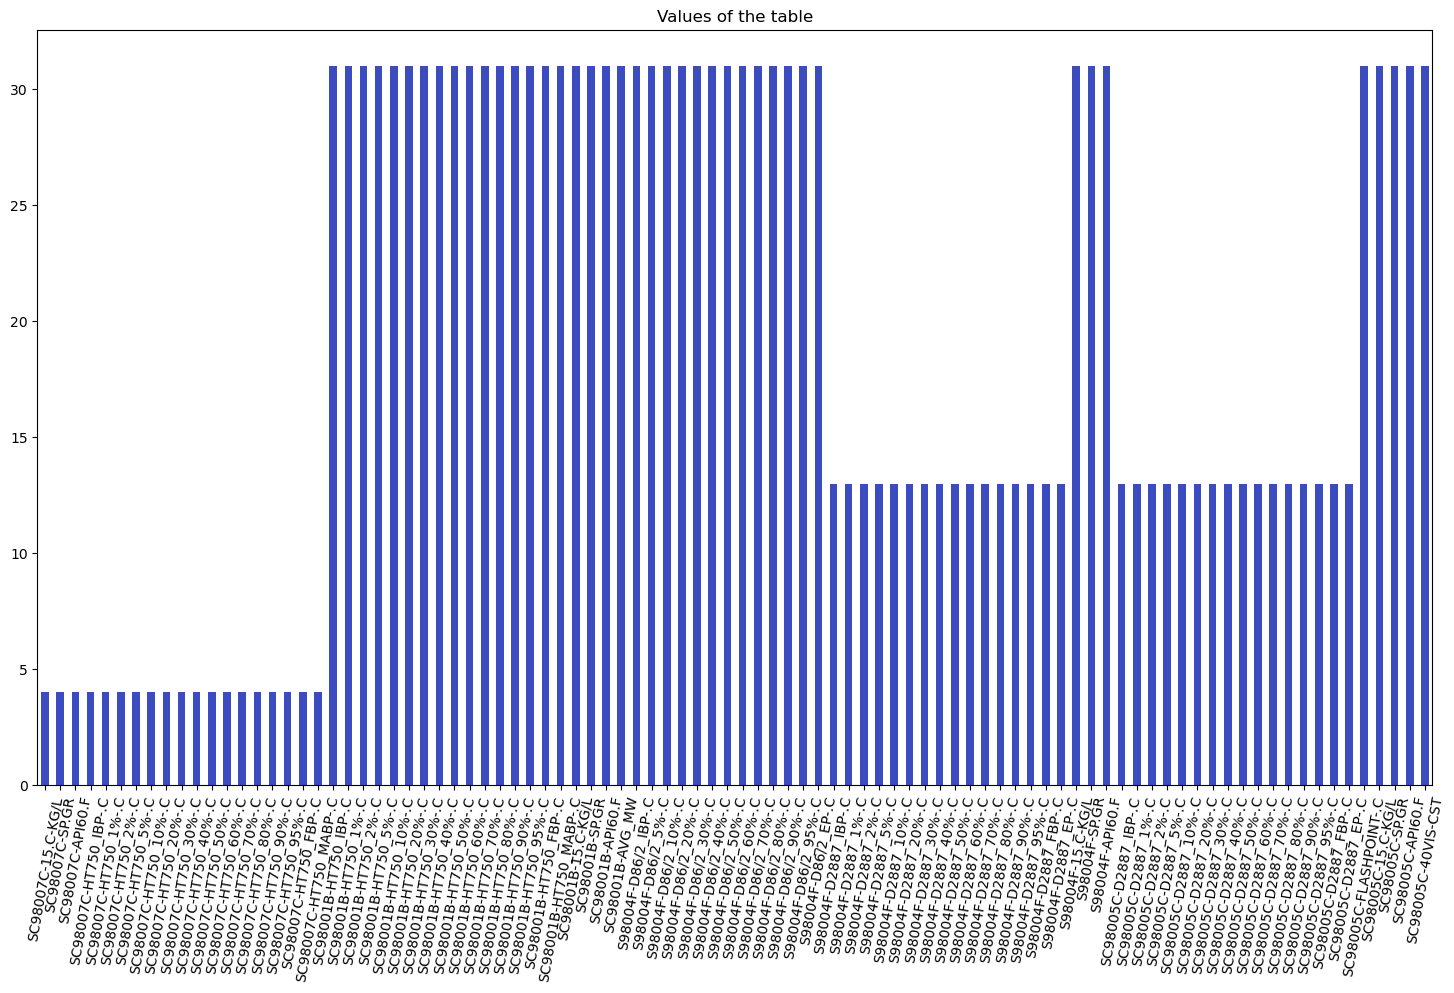

In [134]:
fig, ax = plt.subplots(figsize=(18, 10), dpi=100)
(len(mdf) - nndf.isnull().sum()).plot.bar(ax=ax, colormap='coolwarm')
ax.tick_params(axis='x', rotation = 80)
ax.set_title('Values of the table')

### 將有缺失值的columns先drop掉

In [ ]:
n_cols = ndf.columns.to_list()
len(n_cols)

pdf = mdf.drop(columns=n_cols, axis=1)
pdf.shape

(44640, 98)

###每十分鐘取一次平均: 10min data

In [ ]:
exdf = pdf.set_index('DateTime')
adf = exdf.resample('10T').mean()
adf.head()

,980FT001_C.PNT,980TI120.PNT,980TI118.PNT,980FT025.PNT,980FI044.PNT,980FT043.PNT,980FI058.PNT,980TI133.PNT,980TC134.MEAS,980PI065.PNT,...,980TI124.PNT,980TI125.PNT,980PI063.PNT.1,980TI126.PNT.1,980FT049.PNT,980TC129.MEAS,980PC064.MEAS,980FI048A.PNT,980FI048B.PNT,980TI160.PNT
DateTime,,,,,,,,,,,,,,,,,,,,,
2021-05-01 00:00:00,116.158675,257.508401,330.005609,91847.749221,7.271460,505.998801,68.968929,213.562839,214.601892,144.971881,...,184.431497,310.667078,8.004073,323.177563,2.968166,39.923995,7.796109,1364.658203,1268.697608,39.065882
2021-05-01 00:10:00,116.258935,257.715982,330.179507,91900.435939,7.212797,505.080167,71.996693,213.745808,214.682265,144.580936,...,184.330501,310.256674,8.008896,323.115689,2.955506,40.077175,7.799902,1366.977746,1271.554688,39.095069
2021-05-01 00:20:00,116.314319,257.960736,330.433908,91927.353908,7.207603,502.961902,69.141154,212.887383,213.941824,145.776936,...,184.317500,310.790042,8.010270,323.131641,3.009521,40.175539,7.801401,1365.965613,1271.886645,39.164970
2021-05-01 00:30:00,116.318874,257.591855,329.882285,91959.580469,7.203308,505.023380,70.890778,213.385136,214.385745,143.847221,...,184.330557,310.548767,8.009010,323.223471,3.010712,40.116528,7.803285,1363.536084,1270.251465,39.242222
2021-05-01 00:40:00,116.357404,257.527448,329.843848,91799.499220,7.291162,504.945447,69.864859,212.367303,213.319810,146.560698,...,184.424905,310.544611,8.006248,323.141107,2.979812,40.043863,7.797133,1358.747253,1263.942688,39.199316


###每天取一次平均: day data

In [154]:
ex1df.index.day

Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
            ...
            31, 31, 31, 31, 31, 31, 31, 31, 31, 31],
           dtype='int64', name='DateTime', length=44640)

In [161]:
ex1df.index.to_list()

[Timestamp('2021-05-01 00:00:00'),
 Timestamp('2021-05-01 00:01:00'),
 Timestamp('2021-05-01 00:02:00'),
 Timestamp('2021-05-01 00:03:00'),
 Timestamp('2021-05-01 00:04:00'),
 Timestamp('2021-05-01 00:05:00'),
 Timestamp('2021-05-01 00:06:00'),
 Timestamp('2021-05-01 00:07:00'),
 Timestamp('2021-05-01 00:08:00'),
 Timestamp('2021-05-01 00:09:00'),
 Timestamp('2021-05-01 00:10:00'),
 Timestamp('2021-05-01 00:11:00'),
 Timestamp('2021-05-01 00:12:00'),
 Timestamp('2021-05-01 00:13:00'),
 Timestamp('2021-05-01 00:14:00'),
 Timestamp('2021-05-01 00:15:00'),
 Timestamp('2021-05-01 00:16:00'),
 Timestamp('2021-05-01 00:17:00'),
 Timestamp('2021-05-01 00:18:00'),
 Timestamp('2021-05-01 00:19:00'),
 Timestamp('2021-05-01 00:20:00'),
 Timestamp('2021-05-01 00:21:00'),
 Timestamp('2021-05-01 00:22:00'),
 Timestamp('2021-05-01 00:23:00'),
 Timestamp('2021-05-01 00:24:00'),
 Timestamp('2021-05-01 00:25:00'),
 Timestamp('2021-05-01 00:26:00'),
 Timestamp('2021-05-01 00:27:00'),
 Timestamp('2021-05-

In [152]:
ex1df = pdf.set_index('DateTime')
ans = ex1df.groupby([ex1df.index.year, ex1df.index.month, ex1df.index.day]).mean()
# ans.index = ex1df.index.day.unique()
# ex1df.index.day
didx = mdf['DateTime'].dt.to_period('D')
ans.index = didx.unique()
ans.head()

,980FT001_C.PNT,980TI120.PNT,980TI118.PNT,980FT025.PNT,980FI044.PNT,980FT043.PNT,980FI058.PNT,980TI133.PNT,980TC134.MEAS,980PI065.PNT,...,980TI124.PNT,980TI125.PNT,980PI063.PNT.1,980TI126.PNT.1,980FT049.PNT,980TC129.MEAS,980PC064.MEAS,980FI048A.PNT,980FI048B.PNT,980TI160.PNT
2021-05-01,113.532477,264.498488,330.146857,89898.920357,7.160033,445.451030,117.017840,207.307837,208.247936,144.977691,...,183.000933,306.967259,8.005725,322.731696,3.117041,40.000234,7.799878,1305.118265,1207.115649,39.256382
2021-05-02,112.290174,271.584195,329.922290,89155.167200,7.133365,391.155182,189.133238,202.504751,203.476390,144.986707,...,182.771684,306.071833,8.002641,322.897121,3.108019,39.987442,7.800080,1252.592472,1151.501737,39.361547
2021-05-03,111.917194,272.030867,329.948220,88986.979022,7.140804,389.050694,186.441411,202.529292,203.513166,144.990063,...,183.251796,307.557049,8.000141,323.381561,2.939392,39.985936,7.800174,1219.544029,1113.260391,39.362501
2021-05-04,112.314207,272.430917,329.991177,89377.249529,7.054801,384.234363,181.335901,202.663612,203.490375,144.987478,...,183.238277,308.492126,7.998243,323.658066,2.773151,40.047189,7.800081,1203.982971,1096.355521,39.423556
2021-05-05,112.389232,272.922432,330.066160,89528.448298,7.141498,385.667742,183.776997,202.637472,203.426934,144.980333,...,183.703105,310.547044,7.996403,324.201501,2.709700,39.790014,7.800022,1179.506372,1068.679147,39.084533


this is the columns which recorded every day: 31 sanples

In [ ]:
#0 < nndf nulls < 44640
h = len(nndf) - nndf.isnull().sum() == 31
hdf = nndf[h[h.values].index].dropna(axis=0)
hdf.index = ans.index
hdf.tail()

,SC98001B-HT750_IBP-.C,SC98001B-HT750_1%-.C,SC98001B-HT750_2%-.C,SC98001B-HT750_5%-.C,SC98001B-HT750_10%-.C,SC98001B-HT750_20%-.C,SC98001B-HT750_30%-.C,SC98001B-HT750_40%-.C,SC98001B-HT750_50%-.C,SC98001B-HT750_60%-.C,...,S98004F-D86/2_95%-.C,S98004F-D86/2_EP-.C,S98004F-15.C-KG/L,S98004F-SP.GR,S98004F-API60.F,SC98005C-FLASHPOINT-.C,SC98005C-15.C-KG/L,SC98005C-SP.GR,SC98005C-API60.F,SC98005C-40VIS-CST
2021-05-27,179.600006,198.800003,235.800003,309.200012,351.799988,380.000000,395.000000,406.200012,416.600006,427.200012,...,332.100006,338.200012,0.80100,0.80138,45.071899,194.0,0.84744,0.84788,35.387119,13.372
2021-05-28,178.600006,197.000000,234.199997,307.799988,351.000000,379.799988,394.799988,406.200012,416.600006,427.000000,...,332.899994,338.200012,0.80090,0.80134,45.079948,194.0,0.84741,0.84789,35.384392,13.300
2021-05-29,184.800003,204.000000,237.199997,308.799988,351.600006,380.000000,395.000000,406.399994,416.799988,427.399994,...,334.600006,341.200012,0.80075,0.80113,45.127079,194.0,0.84740,0.84788,35.386360,13.313
2021-05-30,186.000000,207.199997,246.199997,328.399994,381.000000,425.799988,452.200012,472.000000,487.600006,500.399994,...,333.299988,339.100006,0.79736,0.79773,45.878799,188.0,0.85616,0.85665,33.678131,13.518
2021-05-31,187.399994,209.399994,251.000000,332.799988,383.399994,426.799988,453.000000,472.600006,488.000000,500.799988,...,331.700012,336.600006,0.79851,0.79888,45.623081,180.0,0.85767,0.85816,33.387199,13.493


In [ ]:
day_data = pd.concat([ans, hdf], axis=1)
day_data

,980FT001_C.PNT,980TI120.PNT,980TI118.PNT,980FT025.PNT,980FI044.PNT,980FT043.PNT,980FI058.PNT,980TI133.PNT,980TC134.MEAS,980PI065.PNT,...,S98004F-D86/2_95%-.C,S98004F-D86/2_EP-.C,S98004F-15.C-KG/L,S98004F-SP.GR,S98004F-API60.F,SC98005C-FLASHPOINT-.C,SC98005C-15.C-KG/L,SC98005C-SP.GR,SC98005C-API60.F,SC98005C-40VIS-CST
2021-05-01,113.532477,264.498488,330.146857,89898.920357,7.160033,445.451030,117.017840,207.307837,208.247936,144.977691,...,332.399994,337.500000,0.80190,0.80228,44.873520,196.0,0.84813,0.84861,35.242661,13.454
2021-05-02,112.290174,271.584195,329.922290,89155.167200,7.133365,391.155182,189.133238,202.504751,203.476390,144.986707,...,330.399994,335.100006,0.79703,0.79740,45.952320,190.0,0.85727,0.85776,33.464169,12.897
2021-05-03,111.917194,272.030867,329.948220,88986.979022,7.140804,389.050694,186.441411,202.529292,203.513166,144.990063,...,330.700012,335.600006,0.79813,0.79850,45.707489,184.0,0.85758,0.85807,33.404518,12.982
2021-05-04,112.314207,272.430917,329.991177,89377.249529,7.054801,384.234363,181.335901,202.663612,203.490375,144.987478,...,330.799988,336.100006,0.79874,0.79917,45.557678,197.0,0.85879,0.85928,33.172081,13.616
2021-05-05,112.389232,272.922432,330.066160,89528.448298,7.141498,385.667742,183.776997,202.637472,203.426934,144.980333,...,330.799988,336.000000,0.79948,0.79991,45.393719,182.0,0.85854,0.85903,33.220051,13.358
2021-05-06,112.015170,273.219474,330.026960,89237.891017,7.136581,382.195660,191.956421,202.741717,203.492689,144.981951,...,330.299988,335.299988,0.80004,0.80041,45.283989,188.0,0.85812,0.85857,33.308830,13.053
2021-05-07,112.392353,273.514814,330.005020,89530.131436,7.099801,380.062160,185.095907,203.100223,203.500986,144.988158,...,330.600006,335.500000,0.79975,0.80012,45.348171,184.0,0.85840,0.85885,33.255039,13.183
2021-05-08,114.736385,264.300393,329.736905,90871.434024,7.129106,443.870229,173.726072,208.691216,209.550118,144.990584,...,331.399994,335.899994,0.80083,0.80121,45.109421,191.0,0.85883,0.85928,33.172501,13.478
2021-05-09,116.284924,257.729879,329.898788,91827.710375,7.171761,501.626241,172.327385,213.021505,213.961934,144.986164,...,332.799988,338.700012,0.79942,0.79979,45.421242,183.0,0.84856,0.84904,35.158131,13.468
2021-05-10,116.347230,257.798211,329.942805,91941.195444,7.176474,500.979394,171.550257,212.996723,214.011743,144.978625,...,334.299988,341.500000,0.80098,0.80136,45.076309,184.0,0.84795,0.84843,35.278069,13.412
